# calculate correlation between frequency bands

In [1]:
import numpy as np
from ecog_band.datasetAllband import SVMDataset
from ecog_band.models import SVMBinClassifier, DecisionTreeBinClassifier, RandomForestBinClassifier, KNeighborsBinClassifier, GaussianNBBinClassifier
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import os
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from ecog_band.utils import *
from ecog_band.solver import Nfold_solver
import pandas as pd
# from ecog_band.datasetExcludeBand import CustomDatasetExcband

/root/pp/covert-reading/Ecog_pretrain/ecog_band/solver.py:8: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm  # may raise warning about Jupyter


In [2]:
HS = 69
freq = 500
elec = 74
path_elec = f'/public/DATA/overt_reading/dataset_/HS{HS}/{freq}/{elec}'
band_list = get_all_band()
num_samples = len(os.listdir(path_elec))


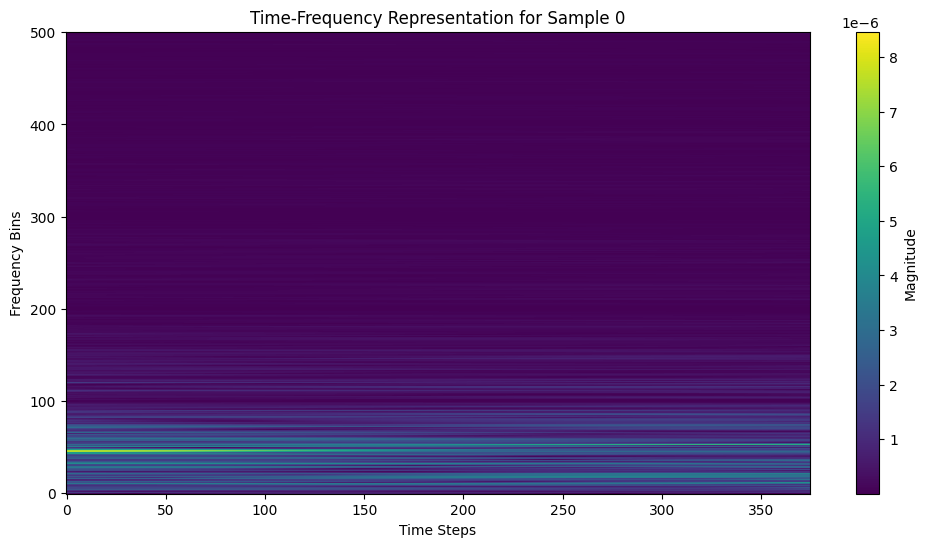

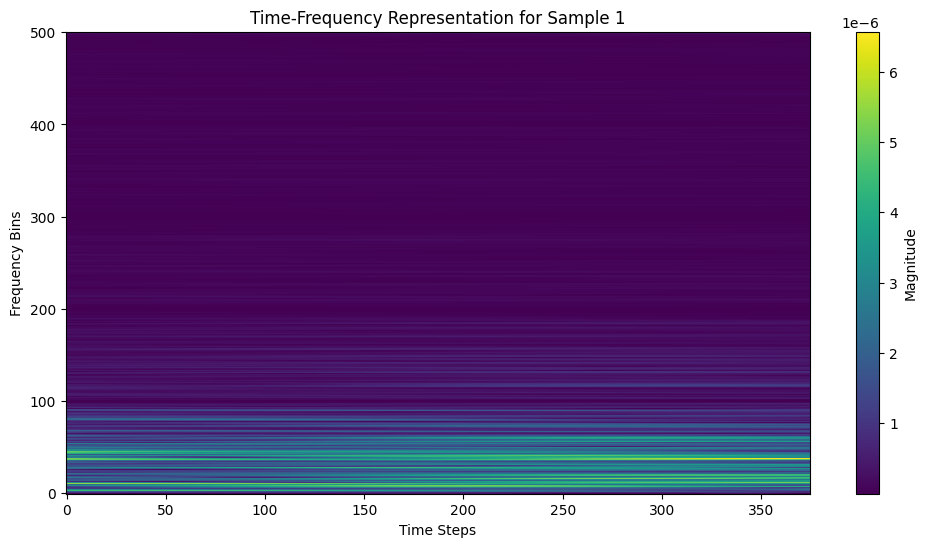

In [3]:
x_cue, x_read = [], []
for num in range(num_samples):
    cue_path = os.path.join(path_elec, f'{num}_data_block_cue.npy')
    read_path = os.path.join(path_elec, f'{num}_data_block_read.npy')
    # base_cue = os.path.join(path_elec, f'')
    if os.path.exists(cue_path) and os.path.exists(read_path):
        elec_cue = np.load(cue_path) # (n_samples, n_freq, n_timePoint) (60, 501, 375)
        elec_read = np.load(read_path)
        x_cue.append(elec_cue)
        x_read.append(elec_read)
x_cue = np.abs(np.vstack(x_cue))
x_read = np.abs(np.vstack(x_read))
# print(x_cue.shape) # (360, 501, 375)

for i in range(2):
    stft_data = x_cue[i, :, :]
    plt.figure(figsize=(12, 6))
    plt.imshow(stft_data, aspect='auto', origin='lower', cmap='viridis')
    plt.colorbar(label='Magnitude')
    plt.title(f'Time-Frequency Representation for Sample {i}')
    plt.xlabel('Time Steps')
    plt.ylabel('Frequency Bins')
    plt.show()


In [4]:
# Compute mean and standard deviation across the time dimension
mean_cue = np.mean(x_cue, axis=2, keepdims=True)
std_cue = np.std(x_cue, axis=2, ddof=0, keepdims=True)

mean_read = np.mean(x_read, axis=2, keepdims=True)
std_read = np.std(x_read, axis=2, ddof=0, keepdims=True)

# Perform mean centering and standardization
x_cue_standardized = (x_cue - mean_cue) / std_cue
x_read_standardized = (x_read - mean_read) / std_read

for i in range(2):
    stft_data = x_cue_standardized[i, :, :]
    plt.figure(figsize=(12, 6))
    plt.imshow(stft_data, aspect='auto', origin='lower', cmap='viridis')
    plt.colorbar(label='Magnitude')
    plt.title(f'Time-Frequency Representation for Sample {i}')
    plt.xlabel('Time Steps')
    plt.ylabel('Frequency Bins')
    plt.show()

x_mean_cue = np.mean(x_cue_standardized, axis=2)
x_mean_read = np.mean(x_read_standardized, axis=2)
corr_matrix_cue = np.corrcoef(x_mean_cue, rowvar=False)
corr_matrix_read = np.corrcoef(x_mean_read, rowvar=False)
# print(x_mean_cue.shape) # (360, 501)
# print(corr_matrix_cue.shape) # (501, 501)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_cue, cmap='coolwarm', vmin=-1, vmax=1, annot=False, fmt='.2f')
plt.title('Correlation Matrix of Frequency Bands - cue')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_read, cmap='coolwarm', vmin=-1, vmax=1, annot=False, fmt='.2f')
plt.title('Correlation Matrix of Frequency Bands - read')
plt.show()